In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

In [16]:
#Read the csv file
df = pd.read_csv("All_Combined_Files_", sep=',')
df.columns = ['website','country_name','count'] 

In [17]:
#Make a list of all countires for future use
countries = df['country_name'].unique().tolist()

#Set the figure size
plt.rcParams["figure.figsize"] = [20.00, 10.00]
plt.rcParams["figure.autolayout"] = True

#Group the data
df = df.groupby(['country_name', 'website'])['count'].sum().reset_index()

#Remove the largest domains
df = df[~df.apply(lambda row: row.astype(str).str.contains('utwente|google|youtube|facebook|bing|twitter|duckduckgo').any(), axis=1)]

#Make a list of domains for later
website_list = df['website'].tolist()

In [20]:
#Make top 10 countries
countries_count = Counter(countries)
# Sort the dictionary by count in descending order
sorted_countries_count = dict(sorted(countries_count.items(), key=lambda item: item[1], reverse=True))
# Get the top 10 countries
topCountries = dict(list(sorted_countries_count.items())[:10])
topCountriesList =[]
for keys, value in topCountries.items():
    topCountriesList.append(keys)
    
df = df[df['country_name'].isin(topCountriesList)]

#Make top 10 domains
website_count = Counter(website_list)
# Sort the dictionary by count in descending order
sorted_website_count = dict(sorted(website_count.items(), key=lambda item: item[1], reverse=True))
# Get the top 10 domains
topWebsites = dict(list(sorted_website_count.items())[:10])
topWebsitesList = []
for keys, value in topWebsites.items():
    topWebsitesList.append(keys)
    
df = df[df['website'].isin(topWebsitesList)]

Text(0.5, 1.0, 'Most prevalent domains per country')

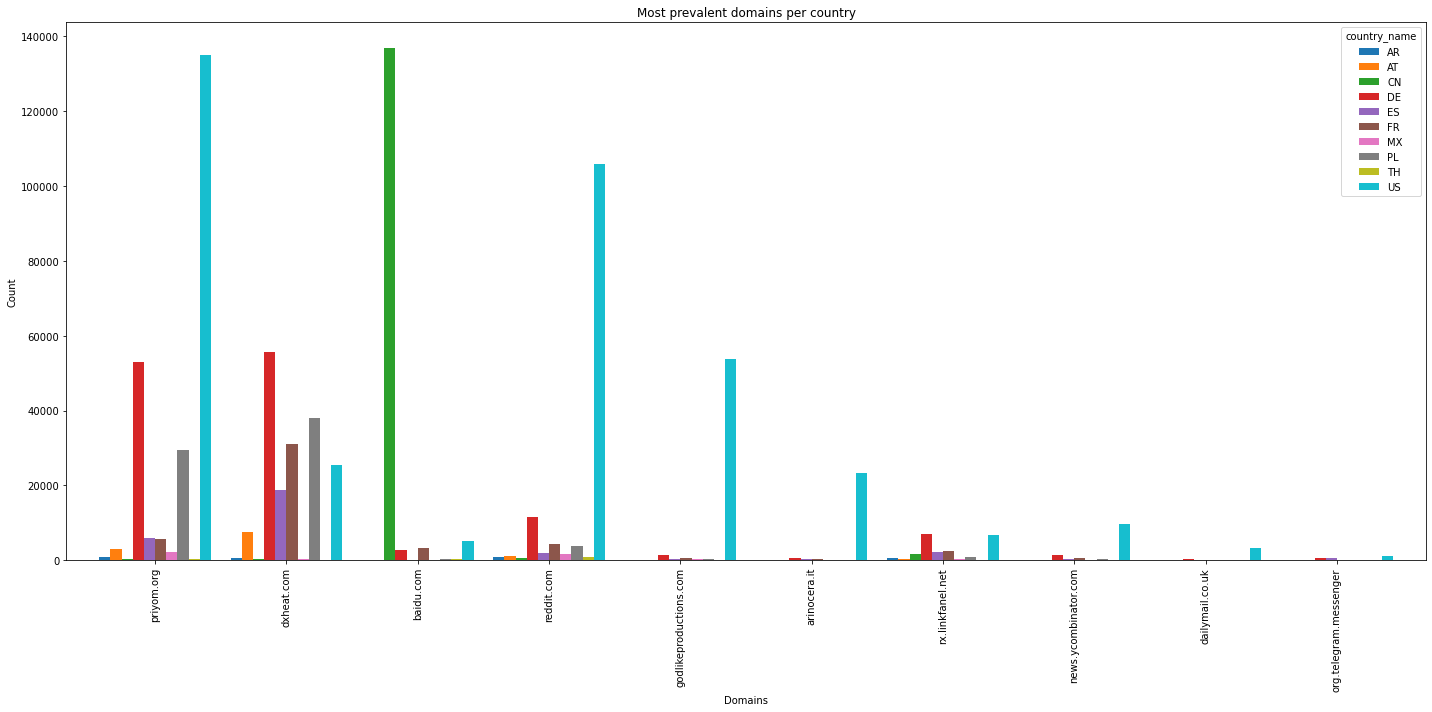

In [21]:
# Countries per domain
pivot_df = df.pivot(index='website', columns='country_name', values='count')
pivot_df['total'] = pivot_df.sum(axis=1)
pivot_df.sort_values(by='total', ascending=False, inplace=True)
pivot_df = pivot_df[~pivot_df.index.duplicated(keep='first')]

#Option to remove the 'total' bar from the plot
pivot_df = pivot_df.drop(columns=['total'])    
    
#Plot the bar chart
pivot_df.plot.bar(stacked=False, width=0.85)  
plt.xlabel('Domains')
plt.ylabel('Count')
plt.title('Most prevalent domains per country')

Text(0.5, 1.0, 'Most prevalent domains per country')

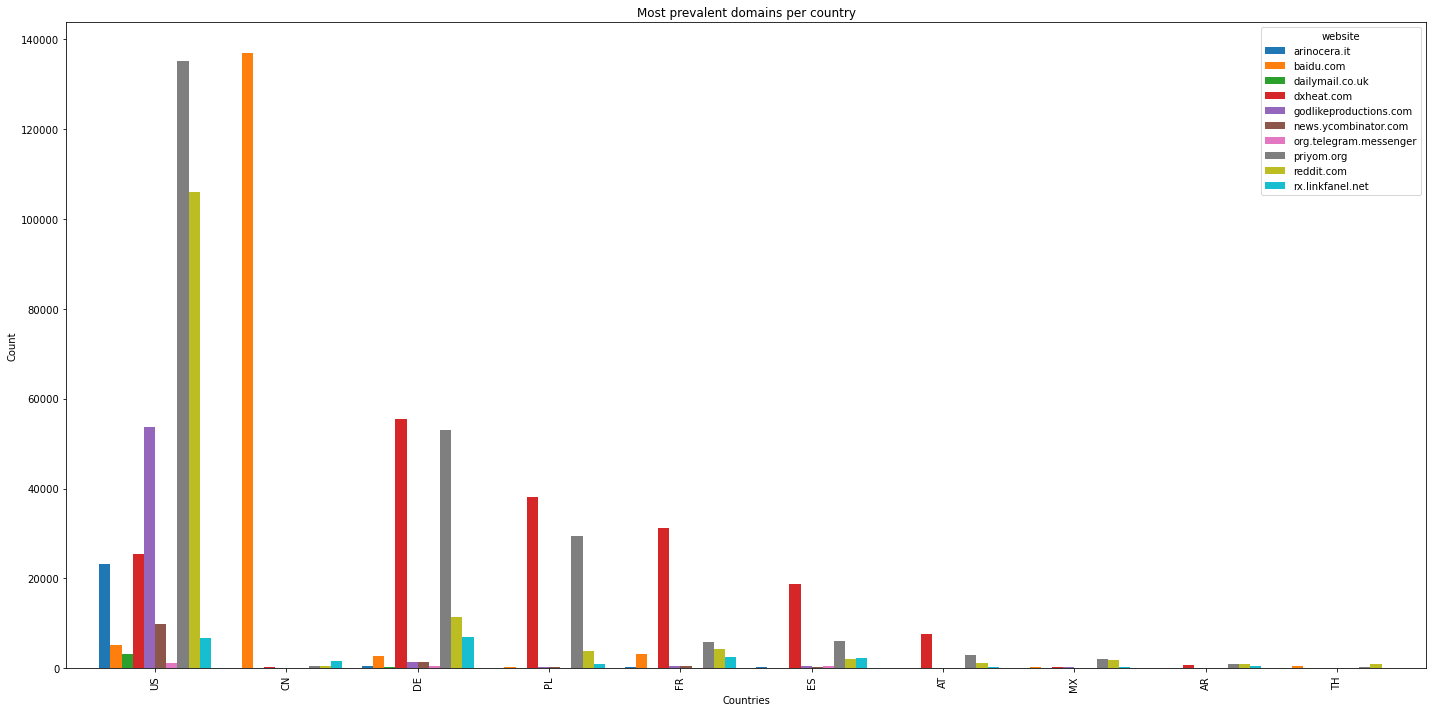

In [23]:
# Domains per country
pivot_df = df.pivot(index='country_name', columns='website', values='count')
pivot_df['total'] = pivot_df.sum(axis=1)
pivot_df.sort_values(by='total', ascending=False, inplace=True)
pivot_df = pivot_df[~pivot_df.index.duplicated(keep='first')]

#Remove 'total' bar from the plot
pivot_df = pivot_df.drop(columns=['total'])    
    
#Plot the bar chart
pivot_df.plot.bar(stacked=False, width=0.85)
#plt.legend(ncol=6)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Most prevalent domains per country')